# Lógica fuzzy: monitoramento de um tanque

- Antecedentes:
    - Fluxo de saida (fsai): baixo & normal;
    - Nível do líquido (nivel): baixo, normal & alto.

- Consequente:
    - Possibilidade de falha 1 (desgaste): 0 - 1;
    - Possibilidade de falha 2 (entupimento): 0 - 1;
    - Possibilidade de falha 3 (vazamento): 0 - 1.

Conjunto de Regras:
1. se (fsai é normal) e (nível é normal) então (f1 não ocorre) (f2 não ocorre) (f3 não ocorre);
2. se (fsai é normal) e (nível é baixo) então (f1 ocorre) (f2 não ocorre) (f3 não ocorre);
3. se (fsai é normal) e (nível é alto) então (f1 não ocorre) (f2 ocorre) (f3 não ocorre);
4. se (fsai é baixo) e (nível é baixo) então (f1 não ocorre) (f2 não ocorre) (f3 ocorre).

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
fluxo_saida = ctrl.Antecedent(np.arange(0.0025,0.004 + 0.001, 0.0015),
                              "fluxo saida")
nivel_liquido = ctrl.Antecedent(np.arange(1,1.4 + 0.1, 0.1),
                                "nivel liquido")

f1 = ctrl.Consequent(np.arange(0,1+1,1), "f1")
f2 = ctrl.Consequent(np.arange(0,1+1,1), "f2")
f3 = ctrl.Consequent(np.arange(0,1+1,1), "f3")

## Membership functions

In [3]:
fluxo_saida['baixo'] = fuzz.trapmf(fluxo_saida.universe,
                                   [0.000481, 0.0025, 0.003, 0.0033])
fluxo_saida['normal'] = fuzz.trimf(fluxo_saida.universe,
                                   [0.003, 0.0033, 0.0036])

In [4]:
nivel_liquido['baixo'] = fuzz.trimf(nivel_liquido.universe,
                                    [0.84, 1, 1.2])
nivel_liquido['normal'] = fuzz.trimf(nivel_liquido.universe,
                                    [1, 1.2, 1.4])
nivel_liquido['alto'] = fuzz.trimf(nivel_liquido.universe,
                                    [1.2, 1.4, 1.56])

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


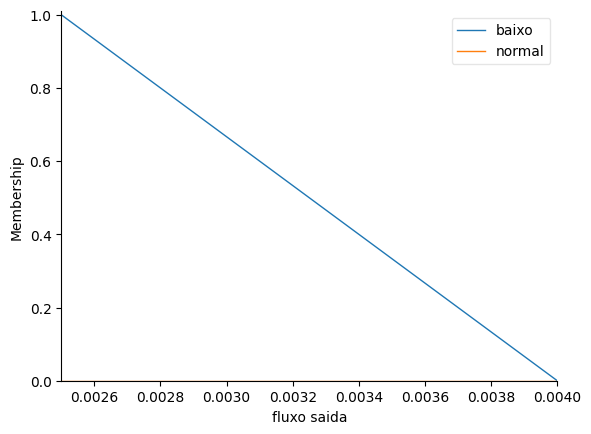

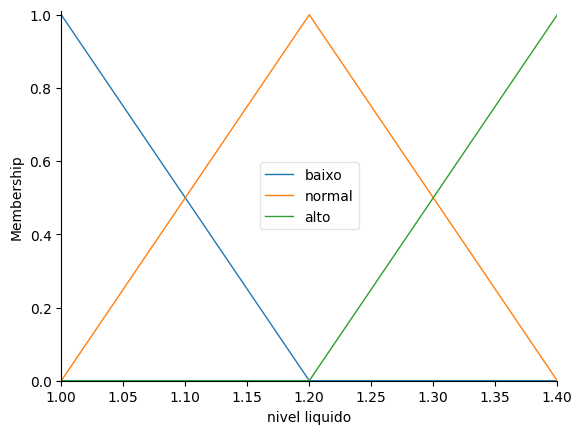

In [5]:
fluxo_saida.view()
nivel_liquido.view()

In [6]:
f1.automf(number=2, names=['ocorre', 'nao ocorre'])
f2.automf(number=2, names=['ocorre', 'nao ocorre'])
f3.automf(number=2, names=['ocorre', 'nao ocorre'])

## Regras do sistema

In [7]:
regra1 = ctrl.Rule(
    fluxo_saida['normal'] & nivel_liquido['normal'],
    (f1['nao ocorre'], f2['nao ocorre'], f3['nao ocorre']))

regra2 = ctrl.Rule(
    fluxo_saida['normal'] & nivel_liquido['baixo'],
    (f1['ocorre'], f2['nao ocorre'], f3['nao ocorre']))

regra3 = ctrl.Rule(
    fluxo_saida['normal'] & nivel_liquido['alto'],
    (f1['nao ocorre'], f2['ocorre'], f3['nao ocorre']))

regra4 = ctrl.Rule(
    fluxo_saida['baixo'] & nivel_liquido['baixo'],
    (f1['nao ocorre'], f2['nao ocorre'], f3['ocorre']))

## Sistema de controle

In [8]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)